
# Baseline

### Import the necessary libraries

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import mimetypes
import seaborn as sns 

# Sklearn libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, roc_auc_score, roc_curve, classification_report, auc, precision_score, recall_score
from sklearn.base import BaseEstimator, TransformerMixin # to create classes
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.impute import (SimpleImputer)
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder, StandardScaler)
from matplotlib.colors import ListedColormap
from matplotlib import transforms
import zlib, json, base64
import requests
import datetime
import matplotlib.ticker as mtick

import warnings

In [2]:
data1 = np.random.random((4, 4))
cmap = plt.cm.Pastel2
my_cmap = cmap(np.arange(cmap.N))
my_cmap[:, -1] = np.linspace(0.5, 0.7, cmap.N)
my_cmap = ListedColormap(my_cmap)

In [3]:
data1 = np.random.random((4, 4))
cmap = plt.cm.Paired
gcmap = cmap(np.arange(cmap.N))
gcmap[:, -1] = np.linspace(0.6, 0.7, cmap.N)
gcmap = ListedColormap(gcmap)

In [4]:
color_list = ['#89C4C2','#D0EBC5', '#F3F7C1', '#F9D4A4', '#F5A2A2', '#BC789E']

#### Import the dataset

In [5]:
df_test = pd.read_csv('data/test_data.csv',  
                      index_col='observation_id')

In [6]:
df_test.dtypes

Type                             object
Date                             object
Part of a policing operation     object
Latitude                        float64
Longitude                       float64
Gender                           object
Age range                        object
Officer-defined ethnicity        object
Legislation                      object
Object of search                 object
station                          object
prediction                      float64
predicted_class                   int64
true_class                        int64
dtype: object

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, ae3e0d41-7c19-4ecc-8d32-767e3bfdb52a to d3441769-81a0-4988-9e36-5113aaacd2ac
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type                          4000 non-null   object 
 1   Date                          4000 non-null   object 
 2   Part of a policing operation  2691 non-null   object 
 3   Latitude                      2829 non-null   float64
 4   Longitude                     2829 non-null   float64
 5   Gender                        4000 non-null   object 
 6   Age range                     4000 non-null   object 
 7   Officer-defined ethnicity     4000 non-null   object 
 8   Legislation                   4000 non-null   object 
 9   Object of search              4000 non-null   object 
 10  station                       4000 non-null   object 
 11  prediction                    4000 non-null   float64
 12  

In [8]:
df_train = pd.read_csv('data/train.csv', 
                       index_col='observation_id')

### EDA (Exploratory Dataset Analysis)

In [9]:
df_test.nunique()

Type                               2
Date                            3451
Part of a policing operation       2
Latitude                        1556
Longitude                       1558
Gender                             3
Age range                          5
Officer-defined ethnicity          5
Legislation                        7
Object of search                  10
station                            6
prediction                      2868
predicted_class                    2
true_class                         2
dtype: int64

In [10]:
attributes = ['Type',
              'Part of a policing operation',
              'Gender', 
              'Age range', 
              'Officer-defined ethnicity', 
              'Legislation', 
              'Object of search', 
              'station']

for col in attributes:
    print(df_test[col].unique())

['Person search' 'Person and Vehicle search']
[False nan True]
['Male' 'Female' 'Other']
['18-24' '10-17' 'over 34' '25-34' 'under 10']
['Black' 'Asian' 'White' 'Other' 'Mixed']
['Criminal Justice Act 1988 (section 139B)'
 'Misuse of Drugs Act 1971 (section 23)'
 'Police and Criminal Evidence Act 1984 (section 1)'
 'Criminal Justice and Public Order Act 1994 (section 60)'
 'Firearms Act 1968 (section 47)'
 'Psychoactive Substances Act 2016 (s36(2))'
 'Poaching Prevention Act 1862 (section 2)']
['Offensive weapons' 'Controlled drugs' 'Article for use in theft'
 'Stolen goods' 'Firearms' 'Articles for use in criminal damage'
 'Fireworks' 'Psychoactive substances' 'Game or poaching equipment'
 'Evidence of offences under the Act']
['nottinghamshire' 'cambridgeshire' 'city-of-london' 'devon-and-cornwall'
 'durham' 'bedfordshire']


In [11]:
df_test.isna().sum()

Type                               0
Date                               0
Part of a policing operation    1309
Latitude                        1171
Longitude                       1171
Gender                             0
Age range                          0
Officer-defined ethnicity          0
Legislation                        0
Object of search                   0
station                            0
prediction                         0
predicted_class                    0
true_class                         0
dtype: int64

In [12]:
df_test['Date'].min()

'2022-01-01T00:35:00+00:00'

In [13]:
df_test['Date'].max()

'2022-03-14T14:45:00+00:00'

#### Convert Data Types

In [14]:
#coordinate_dict = df_train.groupby('station')[['Latitude', 'Longitudes']].mean().fillna(df_train.mean()).to_dict()
coordinate_dict = {'Latitude': {'avon-and-somerset': 51.33175637267479, 
                           'bedfordshire': 51.98144995771613, 
                           'btp': 52.12218768654392, 
                           'cambridgeshire': 52.406997233214504, 
                           'cheshire': 53.27632442323492, 
                           'city-of-london': 51.515312816717575, 
                           'cleveland': 54.34701910875864, 
                           'cumbria': 54.56496815974666, 
                           'derbyshire': 53.00366546443391, 
                           'devon-and-cornwall': 50.5275507427191, 
                           'dorset': 50.72136650800582, 
                           'durham': 54.68126312370846, 
                           'dyfed-powys': 52.12028764514218,
                           'essex': 51.72260861278373, 
                           'gloucestershire': 51.850543872809496, 
                           'hampshire': 50.93112387363688, 
                           'hertfordshire': 51.768994971696216, 
                           'humberside': 53.701766442985075, 
                           'kent': 51.39447867441328, 
                           'lancashire': 53.17557931559899, 
                           'leicestershire': 52.65100891407568, 
                           'lincolnshire': 53.07508733459697, 
                           'merseyside': 53.42796231526082, 
                           'metropolitan': 51.507594764548436, 
                           'norfolk': 52.64004391303848, 
                           'north-wales': 53.180918865456725, 
                           'north-yorkshire': 54.064504035898906, 
                           'northamptonshire': 52.3072518685, 
                           'northumbria': 55.00710826101568, 
                           'nottinghamshire': 51.92553576029973, 
                           'south-yorkshire': 51.92553576029973, 
                           'staffordshire': 52.90053738474921, 
                           'suffolk': 52.15084482566662, 
                           'surrey': 51.325869422737, 
                           'sussex': 50.902363490320866, 
                           'thames-valley': 51.68988934877214, 
                           'warwickshire': 52.37148753310205,
                           'west-mercia': 52.41016790308912, 
                           'west-midlands': 52.48964841613634, 
                           'west-yorkshire': 53.76984142554578, 
                           'wiltshire': 51.421036072453624}, 
                   'Longitude': {'avon-and-somerset': -2.7071552408137083, 
                            'bedfordshire': -0.426417996229464, 
                            'btp': -0.8921149511598153, 
                            'cambridgeshire': -0.0774420258467023, 
                            'cheshire': -2.612427713992298, 
                            'city-of-london': -0.08623273007497918, 
                            'cleveland': -1.2172083120124806,
                            'cumbria': -3.1320293015482052, 
                            'derbyshire': -1.4851611348547717, 
                            'devon-and-cornwall': -4.026554344383304, 
                            'dorset': -2.043267481441048, 
                            'durham': -1.581104200502653, 
                            'dyfed-powys': -4.007564165580568, 
                            'essex': 0.5533465492591425, 
                            'gloucestershire': -2.1959625771622386, 
                            'hampshire': -1.2145474441259134, 
                            'hertfordshire': -0.2599600221595488, 
                            'humberside': -0.4027265295522388, 
                            'kent': 0.5128513800228963, 
                            'lancashire': -2.6421476185305828, 
                            'leicestershire': -1.1536536537719932, 
                            'lincolnshire': -0.31962162829209895, 
                            'merseyside': -2.942090273742405, 
                            'metropolitan': -0.1078484889388174, 
                            'norfolk': 0.9602396567489948, 
                            'north-wales': -3.5553297378131092, 
                            'north-yorkshire': -1.11896528058587, 
                            'northamptonshire': -0.8103302245, 
                            'northumbria': -1.5863827457057507,
                            'nottinghamshire': -0.6653726503038662, 
                            'south-yorkshire': -0.6653726503038662, 
                            'staffordshire': -2.0699261203247317, 
                            'suffolk': 1.020457451894589, 
                            'surrey': -0.4328004846962508, 
                            'sussex': -0.16636629196499603, 
                            'thames-valley': -0.9966845383898041, 
                            'warwickshire': -1.4922003654235327, 
                            'west-mercia': -2.3419879800437395, 
                            'west-midlands': -1.8710733354546436, 
                            'west-yorkshire': -1.648371743890518, 
                            'wiltshire': -1.9036338988449422}}

In [15]:
class ConvertDataTypes(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X=None, y=None, **fit_params):
        return self
    
    def transform(self, data):
        X = data.copy()
        
        # Convert Column Date to Datetime

        X['Date'] = pd.to_datetime(X['Date'])
        X = X.sort_values('Date')
               
        # Convert Columns with Category Values

        cat = ['Type', 
               'Gender',
               'Age range', 
               'Officer-defined ethnicity', 
               'Legislation', 
               'Object of search',
               'station']
        
        for c in cat:
            X[c] = X[c].apply(lambda x: str(x).lower())
        X[cat] = X[cat].astype('category')

        return X

In [16]:
class MergeCategories(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X=None, y=None, **fit_params):
        return self
    
    def transform(self, data):
        X = data.copy()
        
        # Merge Age Range

        X['Age range'] = X['Age range'].replace('under 10', 'under 18')
        X['Age range'] = X['Age range'].replace('10-17', 'under 18')
        
        prevalent_legislation = ['Police and Criminal Evidence Act 1984 (section 1)',
                                 'Misuse of Drugs Act 1971 (section 23)',
                                 'Firearms Act 1968 (section 47)',
                                 'Criminal Justice and Public Order Act 1994 (section 60)', 
                                 'unknown']
        
        X['Legislation'] = X['Legislation'].apply(lambda x: 'other' if x not in prevalent_legislation else x)
        
        return X

In [17]:
class FillNA(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X=None, y=None, **fit_params):
        return self
    
    def transform(self, data):
        X = data.copy()
        
        # Impute Missing Values Lat and Long
        
        X['Latitude'] = X['Latitude'].fillna(X['station'].map(coordinate_dict['Latitude'])).values
        X['Longitude'] = X['Longitude'].fillna(X['station'].map(coordinate_dict['Longitude'])).values
        
        #Fill NA for Legislation 
        X['Legislation'] = X['Legislation'].fillna('unknown')
        
        # Linked_search should be considered to False
        # It was found that officers tend to forget to fill in a None when they don’t find anything. 

        X[['Part of a policing operation',
                  'Outcome linked to object of search']] = X[['Part of a policing operation',
                                                              'Outcome linked to object of search']].fillna(False).astype('boolean')
        
        # Stripped should be filled with False
        # Except when it is Vehicle search, in which case it makes no sense and should be kept as NaN
        # Otherwise should be considered as a data imputation error

        #mask= ((X['type'] != 'Vehicle search') &               (X['stripped'].isna()))

        #X.loc[mask, 'stripped'] = False

        return X

In [18]:
pipeline_clean = Pipeline([('FillNA', FillNA()), 
                           ('MergeCategories', MergeCategories()),
                           ('ConvertDataTypes', ConvertDataTypes())])

In [19]:
df_train = pipeline_clean.fit_transform(df_train)     

In [20]:
positive_outcome = ['Community resolution',
                    'Khat or Cannabis warning',
                    'Caution (simple or conditional)',
                    'Arrest',
                    'Penalty Notice for Disorder',
                    'Summons / charged by post',
                    'Suspect arrested',
                    'Suspect summoned to court']


df_train['positive_outcome'] = [oc in positive_outcome for oc in df_train['Outcome']]

In [21]:
df_train['target'] = df_train['positive_outcome'] & df_train['Outcome linked to object of search']

In [22]:
pipeline_clean = Pipeline([('MergeCategories', MergeCategories()),
                           ('ConvertDataTypes', ConvertDataTypes())])

In [23]:
df_test = pipeline_clean.fit_transform(df_test)     

### EDA

In [24]:
df_test.isna().sum()

Type                               0
Date                               0
Part of a policing operation    1309
Latitude                        1171
Longitude                       1171
Gender                             0
Age range                          0
Officer-defined ethnicity          0
Legislation                        0
Object of search                   0
station                            0
prediction                         0
predicted_class                    0
true_class                         0
dtype: int64

In [25]:
(df_test.isna()).groupby(df_test.station)['Part of a policing operation'].sum()

station
bedfordshire            0
cambridgeshire        415
city-of-london        473
devon-and-cornwall      0
durham                421
nottinghamshire         0
Name: Part of a policing operation, dtype: int64

18


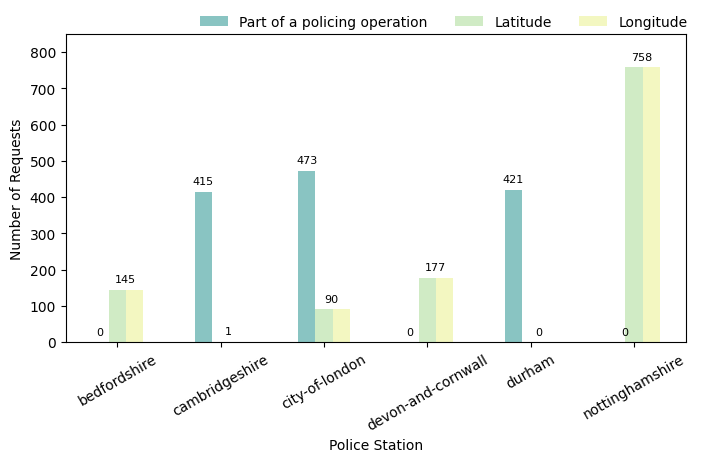

In [26]:
graph_df = (df_test.isna()).groupby(df_test.station)['Part of a policing operation'].sum().rename('Part of Policing Operation').to_frame()\
            .join((df_test.isna()).groupby(df_test.station)['Latitude'].sum().rename('Latitude and Longitude').to_frame())\
            .join((df_test.isna()).groupby(df_test.station)['Longitude'].sum().rename('Longitude').to_frame())

ax = graph_df.plot(kind='bar',color = color_list, figsize=(8, 4))
ax.legend(['Part of a policing operation', 'Latitude', 'Longitude'], ncol = 3, loc='center', bbox_to_anchor=(0.61, 1.04), frameon=False)

print(len(ax.patches))
i = 0
for p in ax.patches:
    if i >= 12:
        break
        
    i += 1
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2. + (0.075 if i >= 6 else 0), height + 20, round(height,1) ,ha="center", fontsize=8)

#plt.legend(frameon=False)
plt.xticks(rotation=30)
plt.ylim(0, 850)
plt.ylabel("Number of Requests")
plt.xlabel("Police Station");

In [27]:
df_test.groupby(df_test.station)['true_class'].count()

station
bedfordshire           827
cambridgeshire         430
city-of-london         473
devon-and-cornwall    1091
durham                 421
nottinghamshire        758
Name: true_class, dtype: int64

In [28]:
df_test.groupby(df_test.station)[['predicted_class', 'true_class']].value_counts().unstack()

true_class                            0    1
station            predicted_class          
bedfordshire       0                 12    3
                   1                641  171
cambridgeshire     0                 11    4
                   1                303  112
city-of-london     0                  0    0
                   1                367  106
devon-and-cornwall 0                 36    4
                   1                861  190
durham             0                  0    0
                   1                310  111
nottinghamshire    0                 15    1
                   1                570  172

In [29]:
df_test.groupby(['station', 'Officer-defined ethnicity'])[['predicted_class', 'true_class']].value_counts().unstack()

true_class                                                      0    1
station            Officer-defined ethnicity predicted_class          
bedfordshire       asian                     0                  0    0
                                             1                128   42
                   black                     0                  3    0
                                             1                135   22
                   mixed                     0                  0    0
                                             1                  0    0
                   other                     0                  0    0
                                             1                  2    1
                   white                     0                  9    3
                                             1                376  106
cambridgeshire     asian                     0                  0    1
                                             1                 34   11
                   black                     0                  0    0
                                             1                 34   12
                   mixed                     0                  0    0
                                             1                  0    0
                   other                     0                  0    0
                                             1                  4    0
                   white                     0                 11    3
                                             1                231   89
city-of-london     asian                     0                  0    0
                                             1                 71   20
                   black                     0                  0    0
                                             1                 88   20
                   mixed                     0                  0    0
                                             1                  0    0
                   other                     0                  0    0
                                             1                 40   14
                   white                     0                  0    0
                                             1                168   52
devon-and-cornwall asian                     0                  0    0
                                             1                 23    3
                   black                     0                  1    0
                                             1                 23   10
                   mixed                     0                  0    0
                                             1                  0    0
                   other                     0                  2    0
                                             1                  2    2
                   white                     0                 33    4
                                             1                813  175
durham             asian                     0                  0    0
                                             1                  3    2
                   black                     0                  0    0
                                             1                  4    1
                   mixed                     0                  0    0
                                             1                  0    0
                   other                     0                  0    0
                                             1                  2    1
                   white                     0                  0    0
                                             1                301  107
nottinghamshire    asian                     0                  0    0
                                             1                 42   19
                   black                     0                  1    0
                                             1                 81   30
                   mixed

#### Compare both datasets

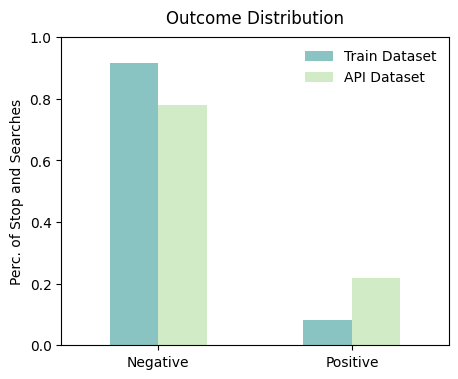

In [30]:
graph_df = df_train["target"].value_counts(normalize=True, dropna = True).rename('Train Dataset').to_frame()\
               .join(df_test["true_class"].value_counts(normalize=True, dropna = False).rename('API Dataset').to_frame())

ax = graph_df.plot(kind='bar',color = color_list, figsize=(5, 4))
plt.legend(frameon=False)
plt.xticks(rotation=0)
ax.set_xticklabels(['Negative', 'Positive'])
plt.ylim(0,1)
plt.title("Outcome Distribution",  pad = 10)
plt.ylabel("Perc. of Stop and Searches");

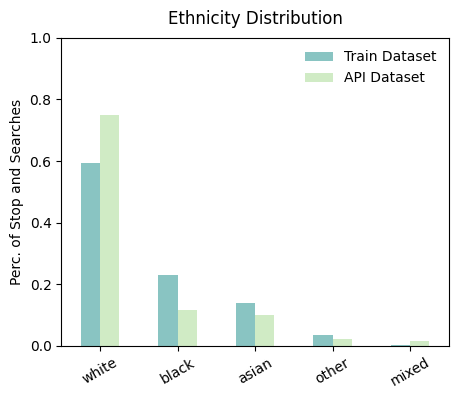

In [31]:
graph_df = df_train["Officer-defined ethnicity"].value_counts(normalize=True, dropna = False).rename('Train Dataset').to_frame()\
               .join(df_test["Officer-defined ethnicity"].value_counts(normalize=True, dropna = False).rename('API Dataset').to_frame())

graph_df.plot(kind='bar',color = color_list, figsize=(5, 4))
plt.legend(frameon=False)
plt.xticks(rotation=30)
plt.ylim(0,1)
plt.title("Ethnicity Distribution",  pad = 10)
plt.ylabel("Perc. of Stop and Searches");

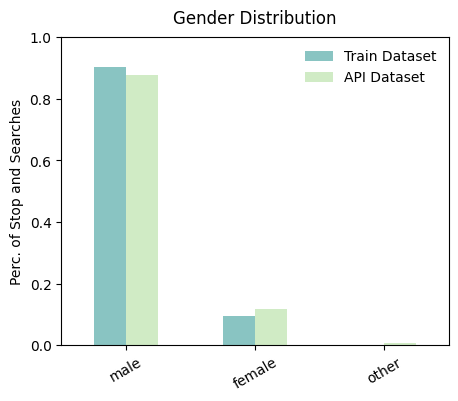

In [32]:
graph_df = df_train["Gender"].value_counts(normalize=True, dropna = False).rename('Train Dataset').to_frame()\
               .join(df_test["Gender"].value_counts(normalize=True, dropna = False).rename('API Dataset').to_frame())

graph_df.plot(kind='bar',color = color_list, figsize=(5, 4))
plt.legend(frameon=False)
plt.xticks(rotation=30)
plt.ylim(0,1)
plt.title("Gender Distribution",  pad = 10)
plt.ylabel("Perc. of Stop and Searches");

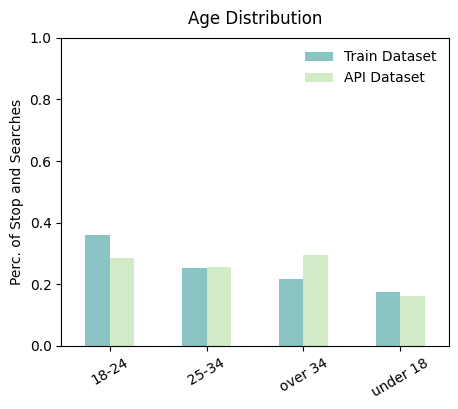

In [33]:
graph_df = df_train["Age range"].value_counts(normalize=True, dropna = False).rename('Train Dataset').to_frame()\
               .join(df_test["Age range"].value_counts(normalize=True, dropna = False).rename('API Dataset').to_frame())

graph_df.plot(kind='bar',color = color_list, figsize=(5, 4))
plt.legend(frameon=False)
plt.xticks(rotation=30)
plt.ylim(0,1)
plt.title("Age Distribution",  pad = 10)
plt.ylabel("Perc. of Stop and Searches");

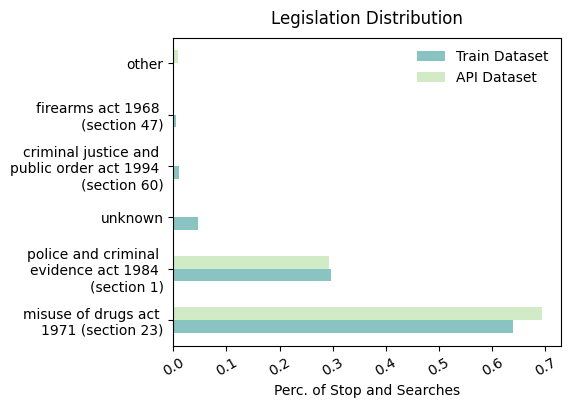

In [34]:
graph_df = df_train["Legislation"].value_counts(normalize=True, dropna = False).rename('Train Dataset').to_frame()\
               .join(df_test["Legislation"].value_counts(normalize=True, dropna = False).rename('API Dataset').to_frame())

ax = graph_df.plot.barh(stacked = False, color = color_list, figsize=(5, 4))
plt.legend(frameon=False)

labels = ['misuse of drugs act \n1971 (section 23)',
          'police and criminal \nevidence act 1984 \n(section 1)',
          'unknown',
          'criminal justice and \npublic order act 1994 \n(section 60)', 
          'firearms act 1968 \n(section 47)',
          'other']

plt.xticks(rotation=30)
ax.set_yticklabels(labels)

plt.title("Legislation Distribution",  pad = 10)
plt.xlabel("Perc. of Stop and Searches");

In [35]:
df_stations = df_train[df_train['station'].isin(['nottinghamshire', 
                                                 'cambridgeshire', 
                                                 'city-of-london', 
                                                 'devon-and-cornwall', 
                                                 'durham',
                                                 'bedfordshire'])]

In [36]:
df_stations["station"]  = df_stations["station"].cat.remove_unused_categories()

/tmp/ipykernel_147/2263793336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stations["station"]  = df_stations["station"].cat.remove_unused_categories()


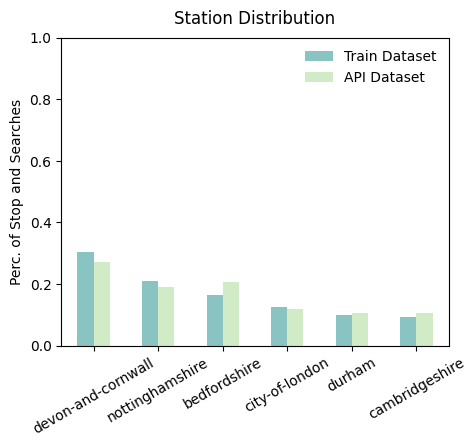

In [37]:
graph_df = df_stations["station"].value_counts(normalize=True, dropna = True).rename('Train Dataset').to_frame()\
               .join(df_test["station"].value_counts(normalize=True, dropna = True).rename('API Dataset').to_frame())

graph_df.plot(kind='bar',color = color_list, figsize=(5, 4))
plt.legend(frameon=False)
plt.xticks(rotation=30)
plt.ylim(0,1)
plt.title("Station Distribution",  pad = 10)
plt.ylabel("Perc. of Stop and Searches");

In [38]:
df_stations.groupby(df_stations.station)['target'].agg(['count'])

,count
station,
bedfordshire,5904
cambridgeshire,3367
city-of-london,4539
devon-and-cornwall,10906
durham,3585
nottinghamshire,7523


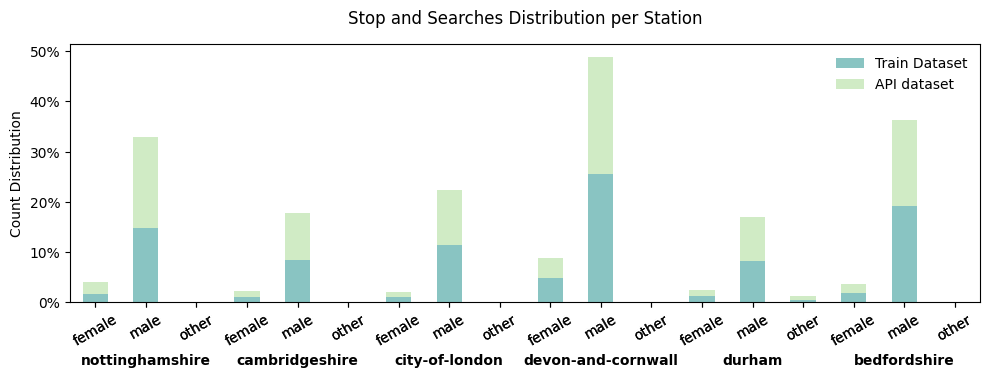

In [39]:
graph_df = 100*(df_stations.groupby(['station', 'Gender'])['Gender'].agg(['count'])/df_stations.shape[0]).rename(columns={'count': 'Train Dataset'})\
               .join((df_test.groupby(['station', 'Gender'])['Gender'].agg(['count'])/df_test.shape[0]).rename(columns={'count': 'API dataset'}))

ax = graph_df.plot(kind='bar', stacked = True, color = color_list, figsize=(10, 4))
plt.legend(frameon=False)
plt.xticks(rotation=30)
plt.xlabel("Perc. of Stop and Searches");

sex = ['', 'female', '', 'male', '', 'other']
labels = ['nottinghamshire', 
          'cambridgeshire', 
          'city-of-london', 
          'devon-and-cornwall',
          'durham',
          'bedfordshire']

ax.set_title('Stop and Searches Distribution per Station', pad = 15)
sex_pos = np.sort([p.get_x() + p.get_width()/2  for p in ax.patches])

ax.set_xticks(sex_pos)
ax.set_xticklabels(np.tile(sex, len(labels)), rotation=30)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))
ax.set_xlabel('') # remove default xlabel

fruit_pos = sex_pos.reshape(-1, len(sex)).mean(axis=1)
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

for pos, label in zip(fruit_pos, labels):
    ax.text(pos, -0.25,  label, transform=trans, ha='center', va='bottom', color='black', fontsize=10, weight = 'bold')
    
plt.ylabel("Count Distribution");    

plt.tight_layout()
plt.show()

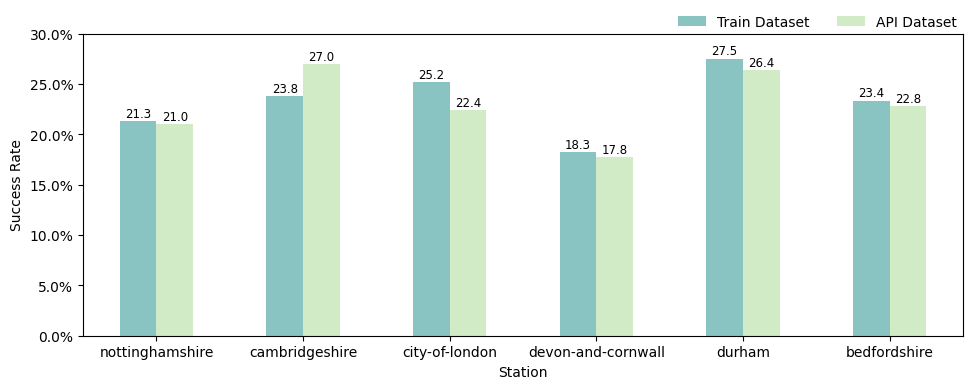

In [40]:
graph_df = 100*(df_stations.groupby(['station'])['target'].agg(['mean'])).rename(columns={'mean': 'Train Dataset'})\
               .join((df_test.groupby(['station'])['true_class'].agg(['mean'])).rename(columns={'mean': 'API dataset'}))

ax = graph_df.plot(kind='bar', stacked = False, color = color_list, figsize=(10, 4))
plt.legend(frameon=False)
plt.xticks(rotation=30)
plt.xlabel('Station')

labels = ['nottinghamshire', 
          'cambridgeshire', 
          'city-of-london', 
          'devon-and-cornwall',
          'durham',
          'bedfordshire']

#ax.set_title('Stop and Searches Success Rate Distribution per Station', pad = 25)
ax.legend(['Train Dataset', 'API Dataset'], ncol = 2, loc='center', bbox_to_anchor=(0.835, 1.04), frameon=False)
ax.set_xticklabels(labels, rotation = 0)

ax.set_ylim(0,30)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))
    
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.4,round(height,1) ,ha="center", fontsize=8.5)
    
plt.ylabel("Success Rate");    

plt.tight_layout()
plt.show()

In [41]:
(df_stations.groupby(['station', 'Officer-defined ethnicity'])['Gender'].agg(['count'])/df_stations.shape[0]).rename(columns={'count': 'Train Dataset'})\
               .join((df_test.groupby(['station', 'Officer-defined ethnicity'])['Gender'].agg(['count'])/df_test.shape[0]).rename(columns={'count': 'API Dataset'}))

Train Dataset  API Dataset
station            Officer-defined ethnicity                            
bedfordshire       asian                           0.048236      0.04250
                   black                           0.027691      0.04000
                   mixed                           0.000000      0.00000
                   other                           0.002345      0.00075
                   white                           0.086534      0.12350
cambridgeshire     asian                           0.011975      0.01150
                   black                           0.009184      0.01150
                   mixed                           0.000000      0.00000
                   other                           0.002373      0.00100
                   white                           0.070456      0.08350
city-of-london     asian                           0.025904      0.02275
                   black                           0.029868      0.02700
                   mixed                           0.000000      0.00000
                   other                           0.009407      0.01350
                   white                           0.061523      0.05500
devon-and-cornwall asian                           0.003908      0.00650
                   black                           0.012450      0.00850
                   mixed                           0.000000      0.00000
                   other                           0.002289      0.00150
                   white                           0.285786      0.25625
durham             asian                           0.001396      0.00125
                   black                           0.001005      0.00125
                   mixed                           0.000000      0.00000
                   other                           0.000642      0.00075
                   white                           0.097030      0.10200
nottinghamshire    asian                           0.022024      0.01525
                   black                           0.026211      0.02800
                   mixed                           0.012450      0.01425
                   other                           0.002847      0.00400
                   white                           0.146466      0.12800

In [42]:
df_stations['api'] = False
df_test['api'] = True

/tmp/ipykernel_147/435659501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stations['api'] = False


In [43]:
df_total = pd.concat([df_stations,df_test])

In [44]:
df_total.groupby(['station', 'api', 'Officer-defined ethnicity'])['Officer-defined ethnicity'].value_counts()

station          api    Officer-defined ethnicity       
bedfordshire     False  asian                      asian    1728
                                                   black       0
                                                   mixed       0
                                                   other       0
                                                   white       0
                                                            ... 
nottinghamshire  True   white                      white     512
                                                   asian       0
                                                   black       0
                                                   mixed       0
                                                   other       0
Name: Officer-defined ethnicity, Length: 250, dtype: int64

In [45]:
df_total.groupby(['station', 'api'])['Officer-defined ethnicity'].agg(['count']).unstack()

count      
api                 False  True
station                        
bedfordshire         5904   827
cambridgeshire       3367   430
city-of-london       4539   473
devon-and-cornwall  10906  1091
durham               3585   421
nottinghamshire      7523   758

In [46]:
df_div = pd.DataFrame([5904, 827, 3367, 430, 4539, 473, 10906, 1091, 3585, 421, 7523, 758], 
                      index =
                     pd.MultiIndex.from_tuples([(      'bedfordshire', False),
            (      'bedfordshire',  True),
            (    'cambridgeshire', False),
            (    'cambridgeshire',  True),
            (    'city-of-london', False),
            (    'city-of-london',  True),
            ('devon-and-cornwall', False),
            ('devon-and-cornwall',  True),
            (            'durham', False),
            (            'durham',  True),
            (   'nottinghamshire', False),
            (   'nottinghamshire',  True)], names=["station", "api"]))

In [47]:
graph_df

,Train Dataset,API dataset
station,,
bedfordshire,21.307588,21.039903
cambridgeshire,23.789724,26.976744
city-of-london,25.203789,22.410148
devon-and-cornwall,18.265175,17.781852
durham,27.531381,26.365796
nottinghamshire,23.355045,22.823219


In [48]:
df_total['Officer-defined ethnicity'] = df_total['Officer-defined ethnicity'].cat.reorder_categories(['white','asian','black', 'mixed', 'other'], ordered=True)

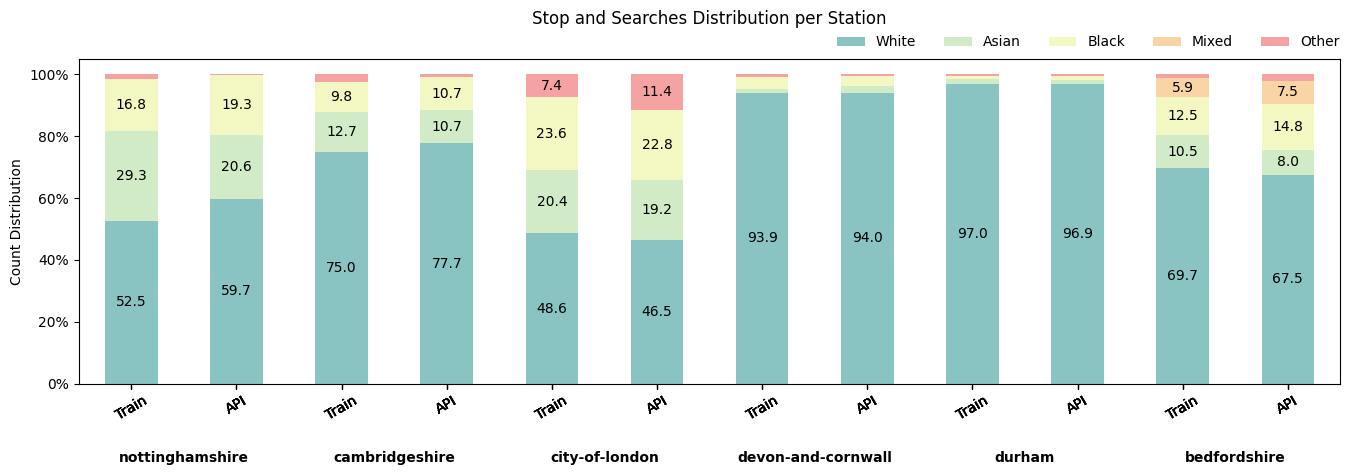

In [49]:
graph_df = df_total.groupby(['station', 'api', 'Officer-defined ethnicity'])['Officer-defined ethnicity'].agg(['count']).unstack()
graph_df = graph_df.div(df_div[0], axis = 0 )*100

ax = graph_df.plot(kind='bar', stacked = True, color = color_list, figsize=(14, 5))
plt.legend(frameon=False)
plt.xticks(rotation=30)
plt.xlabel("Perc. of Stop and Searches");

sex = ['Train', 'API', 'Train', 'API', 'Train', 'API', 'Train', 'API', 'Train', 'API']
labels = ['nottinghamshire', 
          'cambridgeshire', 
          'city-of-london', 
          'devon-and-cornwall',
          'durham',
          'bedfordshire']

ax.set_title('Stop and Searches Distribution per Station', pad = 25)
sex_pos = np.sort([p.get_x() + p.get_width()/2  for p in ax.patches])

ax.legend(['White', 'Asian', 'Black', 'Mixed', 'Other'], ncol = 5, loc='center', bbox_to_anchor=(0.80, 1.05), frameon=False)

ax.set_xticks(sex_pos)
ax.set_xticklabels(np.tile(sex, len(labels)), rotation=30)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))
ax.set_xlabel('') # remove default xlabel

fruit_pos = sex_pos.reshape(-1, len(sex)).mean(axis=1)
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

for pos, label in zip(fruit_pos, labels):
    ax.text(pos, -0.25,  label, transform=trans, ha='center', va='bottom', color='black', fontsize=10, weight = 'bold')

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [round(v.get_height(),1) if v.get_height() > 5 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')
    
plt.ylabel("Count Distribution");    

plt.tight_layout()
plt.show()

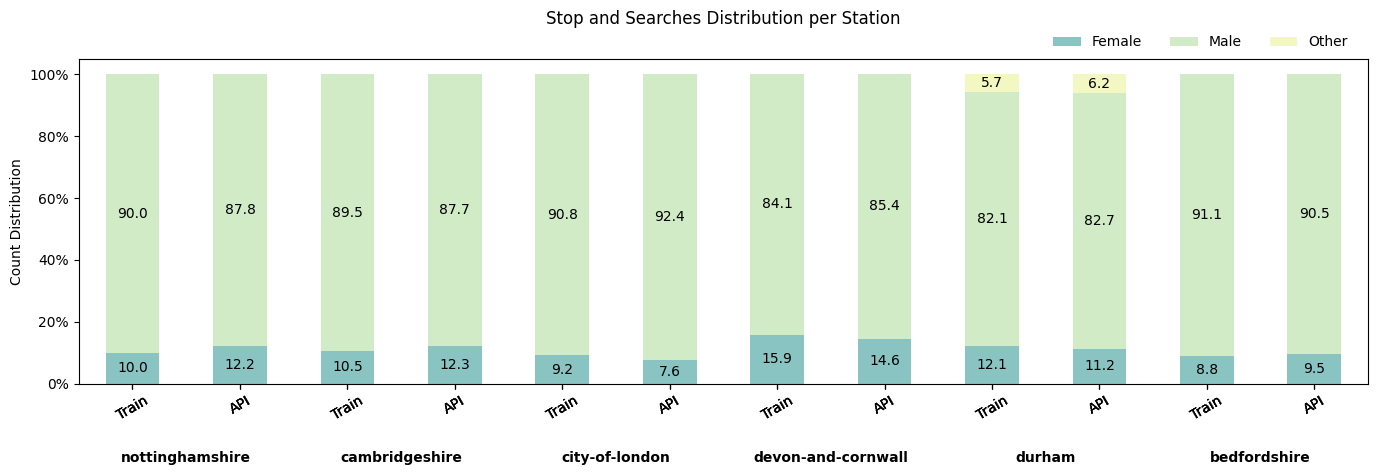

In [50]:
graph_df = df_total.groupby(['station', 'api', 'Gender'])['Gender'].agg(['count']).unstack()
graph_df = graph_df.div(df_div[0], axis = 0 )*100

ax = graph_df.plot(kind='bar', stacked = True, color = color_list, figsize=(14, 5))
plt.legend(frameon=False)
plt.xticks(rotation=30)
plt.xlabel("Perc. of Stop and Searches");

sex = ['Train', 'API', 'Train', 'API', 'Train', 'API',]
labels = ['nottinghamshire', 
          'cambridgeshire', 
          'city-of-london', 
          'devon-and-cornwall',
          'durham',
          'bedfordshire']

ax.set_title('Stop and Searches Distribution per Station', pad = 25)
sex_pos = np.sort([p.get_x() + p.get_width()/2  for p in ax.patches])

ax.legend(['Female', 'Male', 'Other'], ncol = 3, loc='center', bbox_to_anchor=(0.87, 1.05), frameon=False)

ax.set_xticks(sex_pos)
ax.set_xticklabels(np.tile(sex, len(labels)), rotation=30)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))
ax.set_xlabel('') # remove default xlabel

fruit_pos = sex_pos.reshape(-1, len(sex)).mean(axis=1)
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

for pos, label in zip(fruit_pos, labels):
    ax.text(pos, -0.25,  label, transform=trans, ha='center', va='bottom', color='black', fontsize=10, weight = 'bold')

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [round(v.get_height(),1) if v.get_height() > 5 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')
    
plt.ylabel("Count Distribution");    

plt.tight_layout()
plt.show()

In [52]:
df_total.groupby(['station', 'api', 'Age range'])['Age range'].agg(['count']).unstack()

count                       
Age range                18-24 25-34 over 34 under 18
station            api                               
bedfordshire       False  2216  1361    1223     1104
                   True    228   214     277      108
cambridgeshire     False  1179   715     661      812
                   True    126   117     110       77
city-of-london     False  1693  1479    1009      358
                   True    169   150     125       29
devon-and-cornwall False  3136  2771    3105     1894
                   True    252   285     347      207
durham             False  1085   929    1077      494
                   True    143    84     123       71
nottinghamshire    False  2413  2035    2037     1038
                   True    225   178     203      152

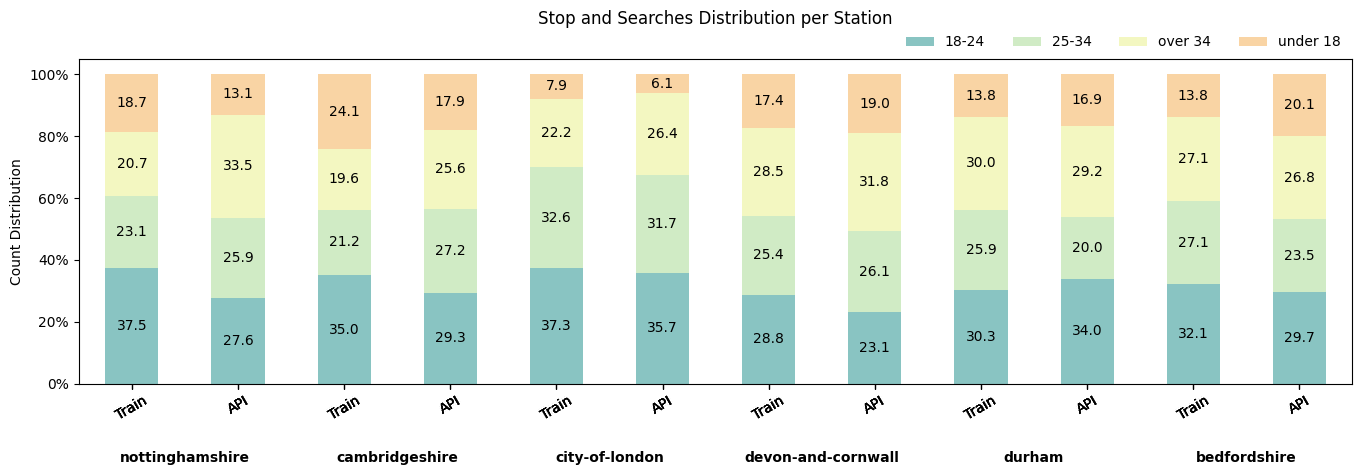

In [60]:
graph_df = df_total.groupby(['station', 'api', 'Age range'])['Age range'].agg(['count']).unstack()
graph_df = graph_df.div(df_div[0], axis = 0 )*100

ax = graph_df.plot(kind='bar', stacked = True, color = color_list, figsize=(14, 5))
plt.legend(frameon=False)
plt.xticks(rotation=30)
plt.xlabel("Perc. of Stop and Searches");

sex = ['Train', 'Train', 'Train', 'Train', 'API', 'API', 'API', 'API',]
labels = ['nottinghamshire', 
          'cambridgeshire', 
          'city-of-london', 
          'devon-and-cornwall',
          'durham',
          'bedfordshire']

ax.set_title('Stop and Searches Distribution per Station', pad = 25)
sex_pos = np.sort([p.get_x() + p.get_width()/2  for p in ax.patches])

ax.legend(['18-24', '25-34', 'over 34', 'under 18'], ncol = 4, loc='center', bbox_to_anchor=(0.82, 1.05), frameon=False)

ax.set_xticks(sex_pos)
ax.set_xticklabels(np.tile(sex, len(labels)), rotation=30)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))
ax.set_xlabel('') # remove default xlabel

fruit_pos = sex_pos.reshape(-1, len(sex)).mean(axis=1)
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

for pos, label in zip(fruit_pos, labels):
    ax.text(pos, -0.25,  label, transform=trans, ha='center', va='bottom', color='black', fontsize=10, weight = 'bold')

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [round(v.get_height(),1) if v.get_height() > 5 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')
    
plt.ylabel("Count Distribution");    

plt.tight_layout()
plt.show()

In [ ]:
df_total['Object of search'].unique()

In [ ]:
graph_df = df_total.groupby(['station', 'api', 'Object of search'])['Object of search'].agg(['count']).unstack()
graph_df = graph_df.div(df_div[0], axis = 0 )*100

ax = graph_df.plot(kind='bar', stacked = True, color = color_list, figsize=(14, 9))
plt.legend(frameon=False)
plt.xticks(rotation=30)
plt.xlabel("Perc. of Stop and Searches");

sex = ['', '', '', '', '', '','', '','', '','', '','', 'Train','', '',
      '', '','', '','', '','', '','', '','', 'API']
labels = ['nottinghamshire', 
          'cambridgeshire', 
          'city-of-london', 
          'devon-and-cornwall',
          'durham',
          'bedfordshire']

ax.set_title('Stop and Searches Distribution per Station', pad = 15)
sex_pos = np.sort([p.get_x() + p.get_width()/2  for p in ax.patches])

ax.legend(['controlled drugs', 'offensive weapons',
       'articles for use in criminal damage', 'stolen goods',
       'evidence of offences under the act', 'article for use in theft',
       'fireworks', 'firearms', 'game or poaching equipment',
       'detailed object of search unavailable', 'crossbows',
       'psychoactive substances',
       'evidence of hunting any wild mammal with a dog',
       'seals or hunting equipment'], ncol = 3, loc='center', bbox_to_anchor=(0.575, -0.315), frameon=False)

ax.set_xticks(sex_pos)
ax.set_xticklabels(np.tile(sex, len(labels)), rotation=30)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))
ax.set_xlabel('') # remove default xlabel

fruit_pos = sex_pos.reshape(-1, len(sex)).mean(axis=1)
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

for pos, label in zip(fruit_pos, labels):
    ax.text(pos, -0.15,  label, transform=trans, ha='center', va='bottom', color='black', fontsize=10, weight = 'bold')

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [round(v.get_height(),1) if v.get_height() > 5 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')
    
plt.ylabel("Count Distribution");    

plt.tight_layout()
plt.show()

In [ ]:
df_total['Legislation'].unique()

In [ ]:
graph_df = df_total.groupby(['station', 'api', 'Legislation'])['Legislation'].agg(['count']).unstack()
graph_df = graph_df.div(df_div[0], axis = 0 )*100

ax = graph_df.plot(kind='bar', stacked = True, color = color_list, figsize=(14, 6))
plt.legend(frameon=False)
plt.xticks(rotation=30)
plt.xlabel("Perc. of Stop and Searches");

sex = ['', '', '', '', '', 'Train','', '', '', '','', 'API']
labels = ['nottinghamshire', 
          'cambridgeshire', 
          'city-of-london', 
          'devon-and-cornwall',
          'durham',
          'bedfordshire']

ax.set_title('Stop and Searches Distribution per Station', pad = 15)
sex_pos = np.sort([p.get_x() + p.get_width()/2  for p in ax.patches])

ax.legend(['misuse of drugs act 1971 (section 23)',
       'police and criminal evidence act 1984 (section 1)', 'other',
       'firearms act 1968 (section 47)', 'unknown',
       'criminal justice and public order act 1994 (section 60)'], ncol = 3, loc='center', bbox_to_anchor=(0.55, -0.35), frameon=False)

ax.set_xticks(sex_pos)
ax.set_xticklabels(np.tile(sex, len(labels)), rotation=30)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None))
ax.set_xlabel('') # remove default xlabel

fruit_pos = sex_pos.reshape(-1, len(sex)).mean(axis=1)
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

for pos, label in zip(fruit_pos, labels):
    ax.text(pos, -0.2,  label, transform=trans, ha='center', va='bottom', color='black', fontsize=10, weight = 'bold')

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [round(v.get_height(),1) if v.get_height() > 1 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')
    
plt.ylabel("Count Distribution");    

plt.tight_layout()
plt.show()

In [ ]:
df_test.groupby(['predicted_class'])['predicted_class'].agg(['count']).unstack()

In [ ]:
df_test.groupby(['true_class'])['true_class'].agg(['count']).unstack()

In [ ]:
confusion_matrix(df_test['predicted_class'], 
                                          df_test['true_class'])

#### Confusion Matrix

In [ ]:
labels = ['Negative', 'Positive']
sns.heatmap(pd.DataFrame(confusion_matrix(df_test['predicted_class'], 
                                          df_test['true_class']), 
                         index = labels, 
                         columns = labels), 
            annot = True,
            cmap = ListedColormap(color_list),
            fmt='g')
plt.xlabel('Actual Outcome', weight='bold')
plt.ylabel('Predicted Outcome', weight='bold')

#### Model Performance

##### Comparison of both ROC Curves (Train and API Dataset) and Precision/Recall Curves

In [ ]:
y_val = pd.read_csv('data/y_model_val.csv').set_index('observation_id')

In [ ]:
y_proba = pd.read_csv('data/y_model_proba.csv').drop(columns = ['Unnamed: 0'])

In [ ]:
fpr_train, tpr_train, threshold_train = roc_curve(y_val, y_proba)
precision_train, recall_train, thresholds_train = precision_recall_curve(y_val, y_proba)

fpr, tpr, threshold = roc_curve(df_test['true_class'], df_test['prediction'])
roc_auc = auc(fpr, tpr)
precision, recall, thresholds = precision_recall_curve(df_test['true_class'], df_test['prediction'])

min_index = [i for i, prec in enumerate(precision) if prec >= 0.2][0]

print("Threshold:\t" , thresholds[min_index])
print("Precision:\t" ,precision[min_index])
print("Recall:\t\t", recall[min_index])

#create Plot
fig = plt.figure(figsize=(9,4))    

axes = fig.add_subplot(1,2,1)
axes = plt.plot(fpr_train, tpr_train, color='#89C4C2', lw=1.5, label='ROC curve ')
axes = plt.plot(fpr, tpr, color='#F8C471', lw=2, label='ROC curve ')

axes = plt.plot([0, 1], [0, 1], color = '#F1948A', lw=2, linestyle='--', label='random')
axes = plt.xlim([-0.05, 1.0])
axes = plt.ylim([0.0, 1.05])
axes = plt.grid()
axes = plt.xlabel('False Positive Rate')
axes = plt.ylabel('True Positive Rate')
axes = plt.title("XGBoost - ROC")
axes = plt.legend(['Test Dataset', 'API Dataset', 'Random'], loc="lower right")

axes = fig.add_subplot(1,2,2)
axes = plt.plot(recall_train, precision_train, color='#89C4C2', lw = 1.5)
axes = plt.plot(recall, precision, color='#F8C471')
axes = plt.hlines(y=0.1, xmin=0, xmax=1, linewidth=1, color = '#F1948A', linestyle="--")
axes = plt.title('Precision-Recall Curve')
axes = plt.ylabel('Precision')
axes = plt.xlabel('Recall')
axes = plt.legend(['Test Dataset', 'API Dataset'], loc="upper right", frameon = False)



In [ ]:
roc_auc_score(df_test['true_class'], df_test['prediction'])

#### Business Requirements

In [ ]:
def CalculatePrecision(y_true, y_pred, threshold = 0.1):
    
    precision = precision_score(y_true, y_pred, pos_label=1)
    recall = recall_score(y_true, y_pred, pos_label=1)
    threshold_fulfilled = (precision >= threshold)
    
    return precision, recall, threshold_fulfilled

In [ ]:
precision, recall, threshold_fulfilled = CalculatePrecision(df_test['true_class'], df_test['predicted_class'])

print("Global Precision: {}".format((threshold_fulfilled, precision)))
print("Global Recall: {}".format(recall))

In [ ]:
def verify_precision_per_station_object(X_test, y_true, y_pred, sensitive_column='Object of search', min_precision=0.1, min_samples=50):
    
    departments = X_test['station'].unique()
    sensitive_classes = X_test[sensitive_column].unique()
    
    is_satisfied = True
    problematic_departments = []
    good_departments = []
    ignored_departments = []
    
    for department in departments:
        precisions = {}
        for sensitive_class in sensitive_classes:
            mask = (X_test[sensitive_column] == sensitive_class) & (X_test['station'] == department)
            if np.sum(mask) > min_samples:
                precisions[sensitive_class] = precision_score(y_true[mask], y_pred[mask], pos_label=1)

        if len(precisions) > 1:    
            diff = np.max(list(precisions.values())) - np.min(list(precisions.values()))

            if diff < min_precision:
                is_satisfied = False
                problematic_departments.append((department, diff, precisions))
            else:
                good_departments.append((department, diff, precisions))
        else:
            ignored_departments.append((department, None, []))
    
    global_precisions = {}
    for sensitive_class in sensitive_classes:
        mask = (X_test[sensitive_column] == sensitive_class)
        if np.sum(mask) > min_samples:
            global_precisions[sensitive_class] = precision_score(y_true[mask], y_pred[mask], pos_label=1)
            
    station_precisions = {}
    for department in departments:
        mask = (X_test['station'] == department)
        if np.sum(mask) > min_samples:
            station_precisions[department] = precision_score(y_true[mask], y_pred[mask])
    
    if len(precisions) > 1:    
        diff = np.max(list(precisions.values())) - np.min(list(precisions.values()))
        if diff < min_precision:
            is_satisfied = False
        
    return is_satisfied, problematic_departments, good_departments, global_precisions, station_precisions

In [ ]:
warnings.filterwarnings('ignore')

is_satisfied, problematic_departments, good_departments, global_precisions, station_precisions = verify_precision_per_station_object(
    df_test, df_test['true_class'], df_test['predicted_class'])


print("Object of search")

#if not is_satisfied:
print("Requirement failed 😢")
print("Global rates: {}".format(global_precisions))
print("Num problematic departments: {}".format(len(problematic_departments)))
print("Num good departments: {}".format(len(good_departments)))
print("avg diff:", np.mean([p[1] for p in problematic_departments]))
print("\nStation rates: {}".format(station_precisions))
print('Maximum diference: {}'.format(max(station_precisions.values()) - min(station_precisions.values())))
print('Stations that fulfill: {}'.format(np.sum([1 for sp in station_precisions.values() if sp >= 0.1 ])))

In [ ]:
problematic_departments

In [ ]:
good_departments

In [ ]:
def verify_no_discrimination(X_test, y_true, y_pred, sensitive_column='Officer-defined ethnicity', max_diff=0.05, min_samples=50):
    """
    Verifies that no subdeparment has discrimination in between protected races
    """
    
    departments = X_test['station'].unique()
    sensitive_classes = X_test[sensitive_column].unique()
    
    is_satisfied = True
    
    problematic_departments = []
    good_departments = []
    ignored_departments = []
    for department in departments:
        precisions = {}
        for sensitive_class in sensitive_classes:
            mask = (X_test[sensitive_column] == sensitive_class) & (X_test['station'] == department)
            if np.sum(mask) > min_samples:
                precisions[sensitive_class] = precision_score(y_true[mask], y_pred[mask], pos_label=1)
                
        if len(precisions) > 1:    
            diff = np.max(list(precisions.values())) - np.min(list(precisions.values()))

            if diff > max_diff:
                is_satisfied = False
                problematic_departments.append((department, diff, precisions))
            else:
                good_departments.append((department, diff, precisions))
        else:
            ignored_departments.append((department, None, []))
    
    global_precisions = {}
    for sensitive_class in sensitive_classes:
        mask = (X_test[sensitive_column] == sensitive_class)
        if np.sum(mask) > min_samples:
            global_precisions[sensitive_class] = precision_score(y_true[mask], y_pred[mask], pos_label=1)
    
    if len(precisions) > 1:    
        diff = np.max(list(precisions.values())) - np.min(list(precisions.values()))
        if diff > max_diff:
            is_satisfied = False
        
    return is_satisfied, problematic_departments, good_departments, global_precisions, ignored_departments

In [ ]:
warnings.filterwarnings('ignore')

is_satisfied, problematic_departments, good_departments, global_precisions, ignored_departments = verify_no_discrimination(
    df_test, df_test['true_class'], df_test['predicted_class'])


print("Officer-defined Ethnicity")

if not is_satisfied:
    print("Requirement failed 😢")
    print("Global rates: {}".format(global_precisions))
    print("Num problematic departments: {}".format(len(problematic_departments)))
    print("Num good departments: {}".format(len(good_departments)))

    print("avg diff:", np.mean([p[1] for p in problematic_departments]))
        

In [ ]:
problematic_departments

In [ ]:
good_departments

In [ ]:
ignored_departments

In [ ]:
print("\nGender")

is_satisfied, problematic_departments, good_departments, global_precisions, ignored_departments = verify_no_discrimination(
    df_test, df_test['true_class'], df_test['predicted_class'], sensitive_column='Gender')

if not is_satisfied:
    print("Requirement failed 😢")
    print("Global rates: {}".format(global_precisions))
    print("Num problematic departments: {}".format(len(problematic_departments)))
    print("Num good departments: {}".format(len(good_departments)))

    print("avg diff:", np.mean([p[1] for p in problematic_departments]))

In [ ]:
problematic_departments

In [ ]:
good_departments

In [ ]:
df_test.groupby(['station']).value_counts